## Used Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
import tensorflow as tf
from keras import models, layers, optimizers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

pd.set_option("display.max_columns", None) 

## Read the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_data.csv")

In [ ]:
raw_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
raw_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
raw_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None): 
    column_types = raw_data.dtypes.reset_index()
    column_types.columns = ["Column Name", "Data Type"]
    print(column_types)

                      Column Name Data Type
0                      SK_ID_CURR     int64
1                          TARGET     int64
2              NAME_CONTRACT_TYPE    object
3                     CODE_GENDER    object
4                    FLAG_OWN_CAR    object
5                 FLAG_OWN_REALTY    object
6                    CNT_CHILDREN     int64
7                AMT_INCOME_TOTAL   float64
8                      AMT_CREDIT   float64
9                     AMT_ANNUITY   float64
10                AMT_GOODS_PRICE   float64
11                NAME_TYPE_SUITE    object
12               NAME_INCOME_TYPE    object
13            NAME_EDUCATION_TYPE    object
14             NAME_FAMILY_STATUS    object
15              NAME_HOUSING_TYPE    object
16     REGION_POPULATION_RELATIVE   float64
17                     DAYS_BIRTH     int64
18                  DAYS_EMPLOYED     int64
19              DAYS_REGISTRATION   float64
20                DAYS_ID_PUBLISH     int64
21                    OWN_CAR_AG

In [ ]:
raw_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Pre-Processing

#### Data Exploratory

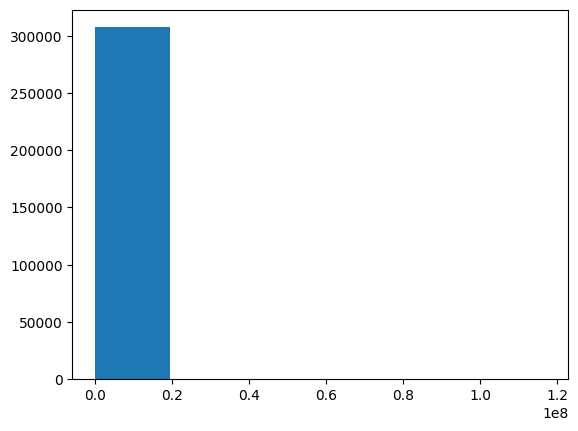

Bin Edges: [2.5650000e+04 1.9521375e+07 3.9017100e+07 5.8512825e+07 7.8008550e+07
 9.7504275e+07 1.1700000e+08]
Frequencies: [3.0751e+05 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]


In [ ]:
values, bins, _ = plt.hist(raw_data["AMT_INCOME_TOTAL"], bins=6)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

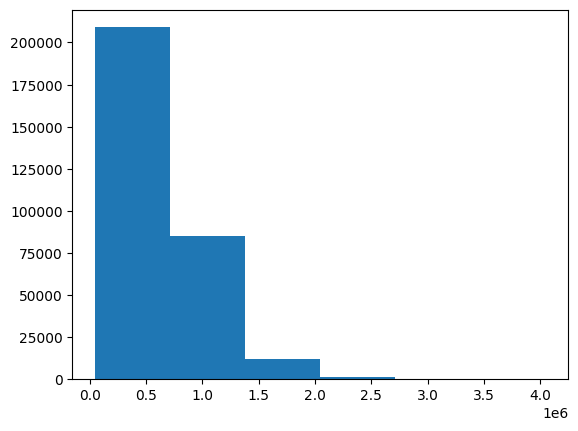

Bin Edges: [  45000.  712500. 1380000. 2047500. 2715000. 3382500. 4050000.]
Frequencies: [2.09142e+05 8.50000e+04 1.19230e+04 1.40200e+03 3.00000e+01 1.40000e+01]


In [ ]:
values, bins, _ = plt.hist(raw_data["AMT_CREDIT"], bins=6)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

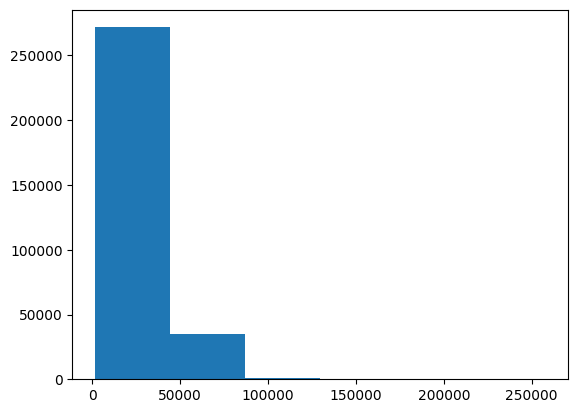

Bin Edges: [  1615.5  44350.5  87085.5 129820.5 172555.5 215290.5 258025.5]
Frequencies: [2.71772e+05 3.46250e+04 9.80000e+02 6.90000e+01 2.50000e+01 2.80000e+01]


In [ ]:
values, bins, _ = plt.hist(raw_data["AMT_ANNUITY"], bins=6)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

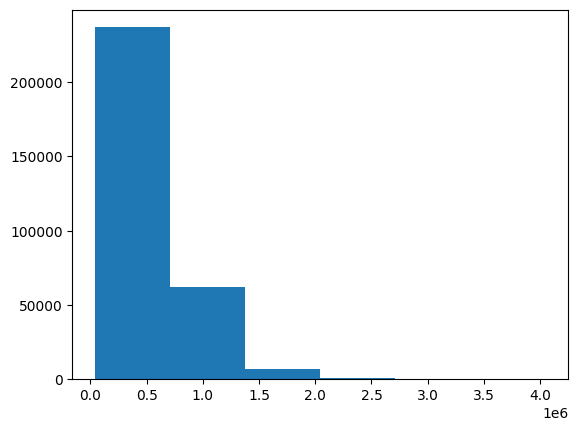

Bin Edges: [  40500.  708750. 1377000. 2045250. 2713500. 3381750. 4050000.]
Frequencies: [2.36924e+05 6.22680e+04 7.04300e+03 9.61000e+02 2.30000e+01 1.40000e+01]


In [ ]:
values, bins, _ = plt.hist(raw_data["AMT_GOODS_PRICE"], bins=6)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

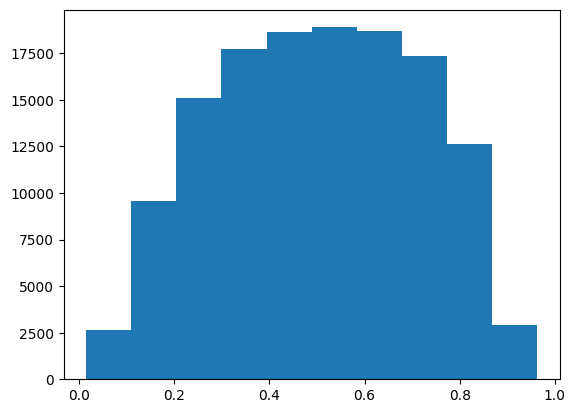

In [ ]:
plt.hist(raw_data["EXT_SOURCE_1"])
plt.show()

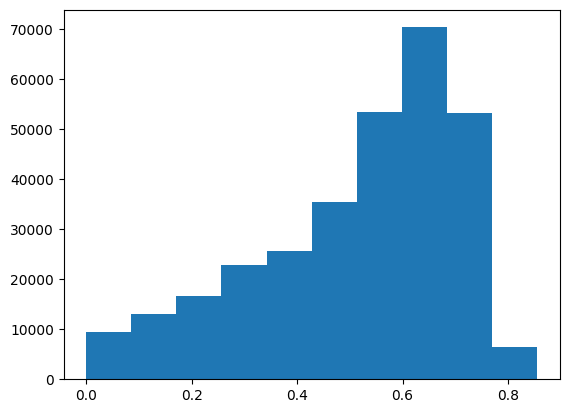

In [ ]:
plt.hist(raw_data["EXT_SOURCE_2"])
plt.show()

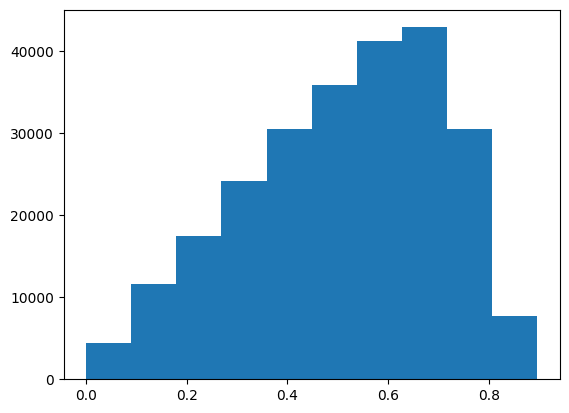

In [ ]:
plt.hist(raw_data["EXT_SOURCE_3"])
plt.show()

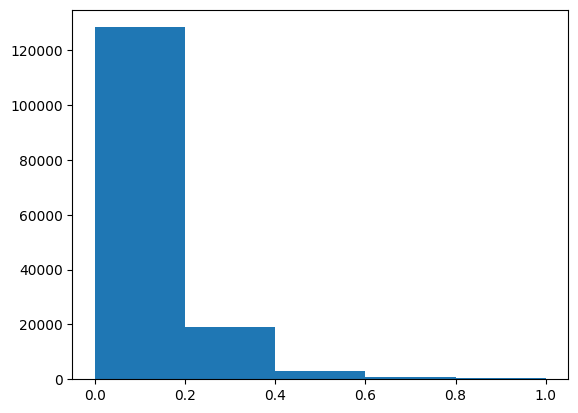

Bin Edges: [0.  0.2 0.4 0.6 0.8 1. ]
Frequencies: [128417.  19045.   2988.    678.    322.]


In [ ]:
values, bins, _ = plt.hist(raw_data["APARTMENTS_AVG"], bins=5)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

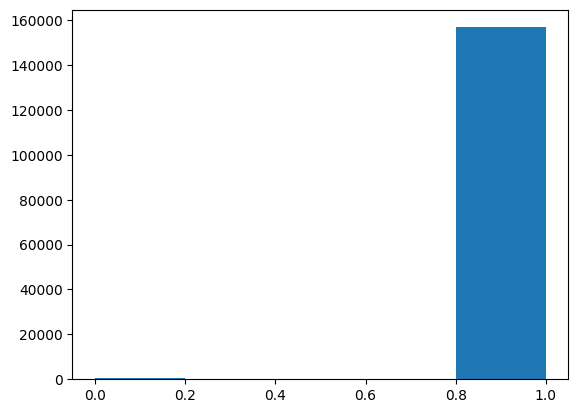

Bin Edges: [0.  0.2 0.4 0.6 0.8 1. ]
Frequencies: [5.2400e+02 2.9000e+01 1.0000e+02 4.1000e+01 1.5681e+05]


In [ ]:
values, bins, _ = plt.hist(raw_data["YEARS_BEGINEXPLUATATION_AVG"], bins=5)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

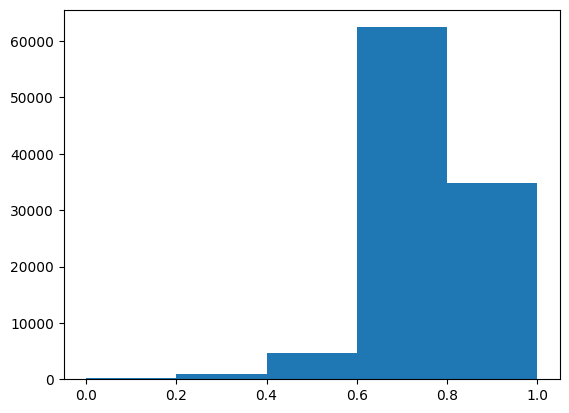

Bin Edges: [0.  0.2 0.4 0.6 0.8 1. ]
Frequencies: [  232.   882.  4670. 62449. 34790.]


In [ ]:
values, bins, _ = plt.hist(raw_data["YEARS_BUILD_AVG"], bins=5)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)

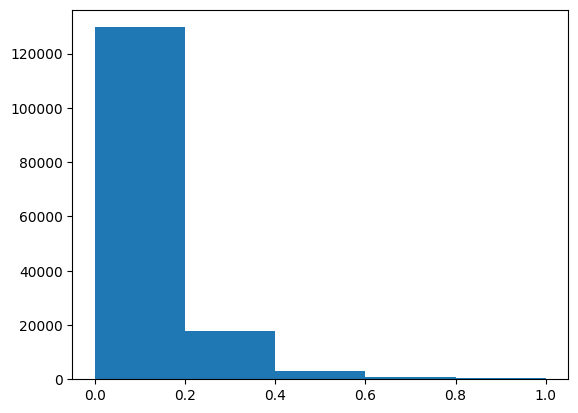

Bin Edges: [0.  0.2 0.4 0.6 0.8 1. ]
Frequencies: [129689.  17736.   2995.    725.    305.]


In [ ]:
values, bins, _ = plt.hist(raw_data["APARTMENTS_MODE"], bins=5)
plt.show()

print("Bin Edges:", bins)
print("Frequencies:", values)


#### Filling Missing Values

In [ ]:
missing_values = raw_data.isnull().sum()

for column, count in missing_values.items():
    if count != 0:
        print(f"{column}: {count}")
    else: 
        continue

AMT_ANNUITY: 12
AMT_GOODS_PRICE: 278
NAME_TYPE_SUITE: 1292
OWN_CAR_AGE: 202929
OCCUPATION_TYPE: 96391
CNT_FAM_MEMBERS: 2
EXT_SOURCE_1: 173378
EXT_SOURCE_2: 660
EXT_SOURCE_3: 60965
APARTMENTS_AVG: 156061
BASEMENTAREA_AVG: 179943
YEARS_BEGINEXPLUATATION_AVG: 150007
YEARS_BUILD_AVG: 204488
COMMONAREA_AVG: 214865
ELEVATORS_AVG: 163891
ENTRANCES_AVG: 154828
FLOORSMAX_AVG: 153020
FLOORSMIN_AVG: 208642
LANDAREA_AVG: 182590
LIVINGAPARTMENTS_AVG: 210199
LIVINGAREA_AVG: 154350
NONLIVINGAPARTMENTS_AVG: 213514
NONLIVINGAREA_AVG: 169682
APARTMENTS_MODE: 156061
BASEMENTAREA_MODE: 179943
YEARS_BEGINEXPLUATATION_MODE: 150007
YEARS_BUILD_MODE: 204488
COMMONAREA_MODE: 214865
ELEVATORS_MODE: 163891
ENTRANCES_MODE: 154828
FLOORSMAX_MODE: 153020
FLOORSMIN_MODE: 208642
LANDAREA_MODE: 182590
LIVINGAPARTMENTS_MODE: 210199
LIVINGAREA_MODE: 154350
NONLIVINGAPARTMENTS_MODE: 213514
NONLIVINGAREA_MODE: 169682
APARTMENTS_MEDI: 156061
BASEMENTAREA_MEDI: 179943
YEARS_BEGINEXPLUATATION_MEDI: 150007
YEARS_BUILD_MEDI: 2

In [ ]:
def fill_na(data, important_features):
    for column in data.columns[data.isnull().any()]:
        missing_percent = data[column].isnull().sum() / len(data)
        is_important = column in important_features
        
        if missing_percent > 0:
            if is_important:
                if missing_percent <= 0.15:
                    if data[column].dtype == object:
                        data[column].fillna(data[column].mode()[0], inplace=True)
                    else:
                        data[column].fillna(data[column].median(), inplace=True)
                else:
                    data[column].fillna("NoInfo", inplace=True)
            else:
                if missing_percent <= 0.15:
                    if data[column].dtype == object:
                        data[column].fillna(data[column].mode()[0], inplace=True)
                    else:
                        data[column].fillna(data[column].median(), inplace=True)
                else:
                    data.drop(column, axis=1, inplace=True)
    
    return data

In [ ]:
important_features = ["AMT_ANNUITY","AMT_GOODS_PRICE","OWN_CAR_AGE","NAME_TYPE_SUITE","CNT_FAM_MEMBERS","EXT_SOURCE_1",
                     "EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","YEARS_BEGINEXPLUATATION_AVG",
                     "YEARS_BUILD_AVG","YEARS_BEGINEXPLUATATION_MODE","APARTMENTS_MODE",
                     "YEARS_BUILD_MODE","APARTMENTS_MEDI","YEARS_BUILD_MEDI", "YEARS_BEGINEXPLUATATION_MODE"
                     "YEARS_BEGINEXPLUATATION_MEDI","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
                     "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE",
                     "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
                     "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR",
                     "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_AVG"]


data = fill_na(raw_data, important_features)

#### Removing Unnecessary Columns

In [ ]:
data = data.drop(["SK_ID_CURR"], axis = 1)
data = data.drop("REGION_RATING_CLIENT", axis = 1)
data = data.drop("REGION_RATING_CLIENT_W_CITY", axis = 1)
data = data.drop("LIVE_REGION_NOT_WORK_REGION", axis = 1)
data = data.drop("LIVE_CITY_NOT_WORK_CITY", axis = 1)
data = data.drop("REG_CITY_NOT_WORK_CITY", axis = 1)
data = data.drop("REG_REGION_NOT_LIVE_REGION", axis = 1)
data = data.drop("REG_REGION_NOT_WORK_REGION", axis = 1)

#### Label Encoding

In [ ]:
label_encoder = LabelEncoder()

data["CODE_GENDER"] = label_encoder.fit_transform(data["CODE_GENDER"])
data["FLAG_OWN_CAR"] = label_encoder.fit_transform(data["FLAG_OWN_CAR"])
data["FLAG_OWN_REALTY"] = label_encoder.fit_transform(data["FLAG_OWN_REALTY"])

## Feature Engineering

#### Creating a new Feature

In [ ]:
data["DAYS_BIRTH"] = abs(data["DAYS_BIRTH"]/365)
data["AGE"] = data["DAYS_BIRTH"].apply(lambda x: round(x))
data = data.drop("DAYS_BIRTH", axis = 1)

data["DAYS_EMPLOYED"] = abs(data["DAYS_EMPLOYED"]/365)
data["YEARS_EMPLOYED"] = data["DAYS_EMPLOYED"].apply(lambda x: round(x))
data = data.drop("DAYS_EMPLOYED", axis = 1)

data["DAYS_REGISTRATION"] = abs(data["DAYS_REGISTRATION"]/365)
data["YEARS_REGISTRATION"] = data["DAYS_REGISTRATION"].apply(lambda x: round(x))
data = data.drop("DAYS_REGISTRATION", axis = 1)

data["DAYS_LAST_PHONE_CHANGE"] = abs(data["DAYS_LAST_PHONE_CHANGE"]/30)
data["MONTHS_LAST_PHONE_CHANGE"] = data["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: round(x))
data = data.drop("DAYS_LAST_PHONE_CHANGE", axis = 1)

data["DAYS_ID_PUBLISH"] = abs(data["DAYS_ID_PUBLISH"]/30)
data["MONTHS_ID_PUBLISH"] = data["DAYS_ID_PUBLISH"].apply(lambda x: round(x))
data = data.drop("DAYS_ID_PUBLISH", axis = 1)

#### Replacing the Values

In [ ]:
data["NAME_EDUCATION_TYPE"] = data["NAME_EDUCATION_TYPE"].replace({
    "Lower secondary": 1,
    "Secondary / secondary special": 2,
    "Academic degree": 3,
    "Incomplete higher": 4,
    "Higher education": 5
})

def replace_credit(value):
    if value < 712500:
        return "Credit_Class_1"
    elif value >= 712500 and value < 1380000:
        return "Credit_Class_2"
    elif value  >= 1380000 and value < 2047500:
        return "Credit_Class_3"
    elif value  >= 2047500 and value < 2715000:
        return "Credit_Class_4"
    elif value  >= 2715000 and value < 3382500:
        return "Credit_Class_5"
    else:
        return "Credit_Class_6"

data["AMT_CREDIT"] = data["AMT_CREDIT"].apply(replace_credit)

def replace_annuity(value):
    if value < 44350.5:
        return "Annuity_Class_1"
    elif value >= 44350.5 and value < 87085.5:
        return "Annuity_Class_2"
    elif value  >= 87085.5 and value < 129820.5:
        return "Annuity_Class_3"
    elif value  >= 129820.5 and value < 172555.5:
        return "Annuity_Class_4"
    elif value  >= 172555.5 and value < 215290.5:
        return "Annuity_Class_5"
    else:
        return "Annuity_Class_6"

data["AMT_ANNUITY"] = data["AMT_ANNUITY"].apply(replace_annuity)

def replace_goods(value):
    if value < 708750:
        return "Goods_Class_1"
    elif value >= 708750 and value < 1377000:
        return "Goods_Class_2"
    elif value  >= 1377000 and value < 2045250:
        return "Goods_Class_3"
    elif value  >= 2045250 and value < 2713500:
        return "Goods_Class_4"
    elif value  >= 2713500 and value < 3381750:
        return "Goods_Class_5"
    else:
        return "Goods_Class_6"

data["AMT_GOODS_PRICE"] = data["AMT_GOODS_PRICE"].apply(replace_goods)


def replace_registration(value):
    if value == 0:
        return "No Register"
    elif value > 0 and value < 4:
        return "1-3 Register"
    elif value  > 3 and value < 11:
        return "4-10 Register"
    else:
        return "10+ Register"

data["YEARS_REGISTRATION"] = data["YEARS_REGISTRATION"].apply(replace_registration)

def replace_employed_class(value):
    if value == 0:
        return "No Work"
    elif value > 0 and value < 4:
        return "1-3 Work"
    elif value  > 3 and value < 11:
        return "4-10 Age"
    else:
        return "10+ Age"

data["YEARS_EMPLOYED"] = data["YEARS_EMPLOYED"].apply(replace_employed_class)

def replace_age(value):
    if value >= 21 and value < 25:
        return "Youth"
    elif value >= 25 and value < 35:
        return "Adullt"
    elif value  >= 35 and value < 50:
        return "Middle-Age"
    else:
        return "Elder"

data["AGE"] = data["AGE"].apply(replace_age)

def replace_ext_source(value):
    if value == "NoInfo":
        return value
    elif value > 0 and value < 0.2:
        return "0.0 - 0.2 Score"
    elif value >= 0.2 and value < 0.4:
        return "0.2 - 0.4 Score"
    elif value  >= 0.4 and value < 0.6:
        return "0.4 - 0.6 Score"
    elif value >= 0.6 and value < 0.8:
        return "0.6 - 0.8 Score"
    elif value >= 0.8:
        return "0.80+ Score"

    
data["EXT_SOURCE_1"] = data["EXT_SOURCE_1"].apply(replace_ext_source)
data["EXT_SOURCE_2"] = data["EXT_SOURCE_2"].apply(replace_ext_source)
data["EXT_SOURCE_3"] = data["EXT_SOURCE_3"].apply(replace_ext_source)

def replace_own_car_age(value):
    if value == "NoInfo":
        return value
    elif value == 0:
        return "No Car"
    elif value > 0 and value < 4:
        return "1-3 Age"
    elif value  > 3 and value < 7:
        return "4-6 Age"
    else:
        return "7+ Age"

data["OWN_CAR_AGE"] = data["OWN_CAR_AGE"].apply(replace_own_car_age)

def replace_cnt_children(value):
    if value == 0:
        return "0 Child"
    elif value > 0 and value < 3:
        return "1-2 Child"
    elif value  > 2 and value < 5:
        return "3-4 Child"
    else:
        return "5+ Child"

data["CNT_CHILDREN"] = data["CNT_CHILDREN"].apply(replace_cnt_children)

def replace_income(value):
    if value < 19521375:
        return "Income_Class_1"
    elif value >= 19521375 and value < 39017100:
        return "Income_Class_2"
    elif value  >= 39017100 and value < 58512825:
        return "Income_Class_3"
    elif value  >= 58512825 and value < 78008550:
        return "Income_Class_4"
    elif value  >= 78008550 and value < 97504275:
        return "Income_Class_5"
    else:
        return "Income_Class_6"

data["AMT_INCOME_TOTAL"] = data["AMT_INCOME_TOTAL"].apply(replace_income)

def replace_apartments(value):
    if value == "NoInfo":
        return value
    elif value > 0 and value < 0.2:
        return "0.0 - 0.2 Score"
    elif value >= 0.2 and value < 0.4:
        return "0.2 - 0.4 Score"
    elif value  >= 0.4 and value < 0.6:
        return "0.4 - 0.6 Score"
    elif value >= 0.6 and value < 0.8:
        return "0.6 - 0.8 Score"
    elif value >= 0.8:
        return "0.80+ Score"

data["APARTMENTS_AVG"] = data["APARTMENTS_AVG"].apply(replace_apartments)
data["APARTMENTS_MODE"] = data["APARTMENTS_MODE"].apply(replace_apartments)
data["APARTMENTS_MEDI"] = data["APARTMENTS_MEDI"].apply(replace_apartments)

def replace_beginexpluatation(value):
    if value == "NoInfo":
        return value
    elif value > 0 and value < 0.2:
        return "0.0 - 0.2 Score"
    elif value >= 0.2 and value < 0.4:
        return "0.2 - 0.4 Score"
    elif value  >= 0.4 and value < 0.6:
        return "0.4 - 0.6 Score"
    elif value >= 0.6 and value < 0.8:
        return "0.6 - 0.8 Score"
    elif value >= 0.8:
        return "0.80+ Score"

data["YEARS_BEGINEXPLUATATION_AVG"] = data["YEARS_BEGINEXPLUATATION_AVG"].apply(replace_beginexpluatation)
data["YEARS_BEGINEXPLUATATION_MODE"] = data["YEARS_BEGINEXPLUATATION_MODE"].apply(replace_beginexpluatation)
data["YEARS_BEGINEXPLUATATION_MEDI"] = data["YEARS_BEGINEXPLUATATION_MEDI"].apply(replace_beginexpluatation)

def replace_build(value):
    if value == "NoInfo":
        return value
    elif value > 0 and value < 0.2:
        return "0.0 - 0.2 Score"
    elif value >= 0.2 and value < 0.4:
        return "0.2 - 0.4 Score"
    elif value  >= 0.4 and value < 0.6:
        return "0.4 - 0.6 Score"
    elif value >= 0.6 and value < 0.8:
        return "0.6 - 0.8 Score"
    elif value >= 0.8:
        return "0.80+ Score"

data["YEARS_BUILD_MODE"] = data["YEARS_BUILD_MODE"].apply(replace_beginexpluatation)
data["YEARS_BUILD_MEDI"] = data["YEARS_BUILD_MEDI"].apply(replace_beginexpluatation)
data["YEARS_BUILD_AVG"] = data["YEARS_BUILD_AVG"].apply(replace_beginexpluatation)

#### Scaling

In [ ]:
for col in data:
    if data[col].dtype == object:
        print(f"Mode of {col}: {data[col].mode()[0]}")
        print()
    else:
        numeric_series = data[col][pd.to_numeric(data[col], errors='coerce').notnull()]
        print(f"Min of {col}: {numeric_series.min()}")
        print(f"Max of {col}: {numeric_series.max()}")
        print()

Min of TARGET: 0
Max of TARGET: 1

Mode of NAME_CONTRACT_TYPE: Cash loans

Min of CODE_GENDER: 0
Max of CODE_GENDER: 2

Min of FLAG_OWN_CAR: 0
Max of FLAG_OWN_CAR: 1

Min of FLAG_OWN_REALTY: 0
Max of FLAG_OWN_REALTY: 1

Mode of CNT_CHILDREN: 0 Child

Mode of AMT_INCOME_TOTAL: Income_Class_1

Mode of AMT_CREDIT: Credit_Class_1

Mode of AMT_ANNUITY: Annuity_Class_1

Mode of AMT_GOODS_PRICE: Goods_Class_1

Mode of NAME_TYPE_SUITE: Unaccompanied

Mode of NAME_INCOME_TYPE: Working

Min of NAME_EDUCATION_TYPE: 1
Max of NAME_EDUCATION_TYPE: 5

Mode of NAME_FAMILY_STATUS: Married

Mode of NAME_HOUSING_TYPE: House / apartment

Min of REGION_POPULATION_RELATIVE: 0.00029
Max of REGION_POPULATION_RELATIVE: 0.072508

Mode of OWN_CAR_AGE: NoInfo

Min of FLAG_MOBIL: 0
Max of FLAG_MOBIL: 1

Min of FLAG_EMP_PHONE: 0
Max of FLAG_EMP_PHONE: 1

Min of FLAG_WORK_PHONE: 0
Max of FLAG_WORK_PHONE: 1

Min of FLAG_CONT_MOBILE: 0
Max of FLAG_CONT_MOBILE: 1

Min of FLAG_PHONE: 0
Max of FLAG_PHONE: 1

Min of FLAG_

In [ ]:
need_scaling_columns = ["HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                       "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR",
                       "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
                       "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "MONTHS_LAST_PHONE_CHANGE",
                       "MONTHS_ID_PUBLISH"]

scaler = StandardScaler()
data[need_scaling_columns] = scaler.fit_transform(data[need_scaling_columns])

#### Data Correlation

<ipython-input-274-7fc8f4b9fe75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


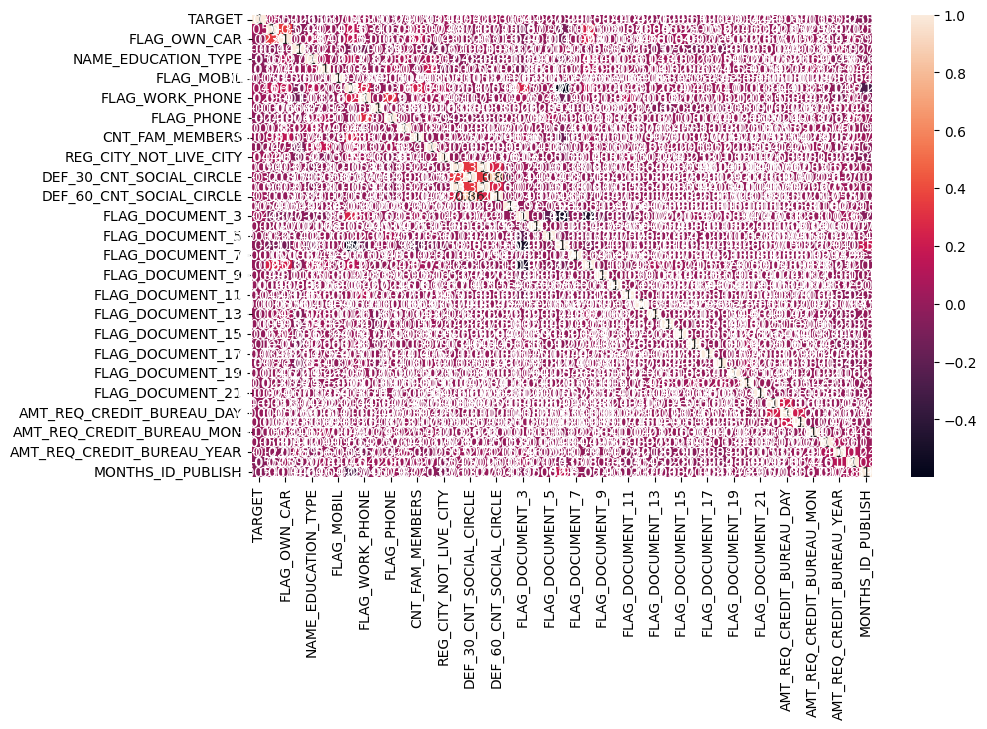

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
corr = data.corr()

high_corr = []

for i in range(len(corr.columns)-1):
    corr_list = []
    
    for j in range(len(corr.columns)):
        if corr.iloc[i][j] >= 0.50:
            col_name = corr.columns[j]
            if col_name != corr.columns[i]:
                corr_list.append(col_name)
                
    if corr_list:
        high_corr.append([f"{corr.columns[i]}: {', '.join(corr_list)}"])
        
high_corr

<ipython-input-275-f551d92d5dd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


[['OBS_30_CNT_SOCIAL_CIRCLE: OBS_60_CNT_SOCIAL_CIRCLE'],
 ['DEF_30_CNT_SOCIAL_CIRCLE: DEF_60_CNT_SOCIAL_CIRCLE'],
 ['OBS_60_CNT_SOCIAL_CIRCLE: OBS_30_CNT_SOCIAL_CIRCLE'],
 ['DEF_60_CNT_SOCIAL_CIRCLE: DEF_30_CNT_SOCIAL_CIRCLE']]

In [ ]:
data["OBS_AVG_CNT_SOCIAL_CIRCLE"] = (data["OBS_30_CNT_SOCIAL_CIRCLE"] + data["OBS_60_CNT_SOCIAL_CIRCLE"])/2
data = data.drop("OBS_30_CNT_SOCIAL_CIRCLE", axis = 1)
data = data.drop("OBS_60_CNT_SOCIAL_CIRCLE", axis = 1)

data["DEF_AVG_CNT_SOCIAL_CIRCLE"] = (data["DEF_30_CNT_SOCIAL_CIRCLE"] + data["DEF_60_CNT_SOCIAL_CIRCLE"])/2
data = data.drop("DEF_30_CNT_SOCIAL_CIRCLE", axis = 1)
data = data.drop("DEF_60_CNT_SOCIAL_CIRCLE", axis = 1)

#### Data Split

In [ ]:
X = data.drop(["TARGET"], axis = 1)
y = data["TARGET"]

#### One-Hot Encoding

In [ ]:
object_columns = X.select_dtypes(include=['object']).columns.tolist()

X_encoded = pd.get_dummies(X[object_columns], drop_first=True)

#### Over Sampling

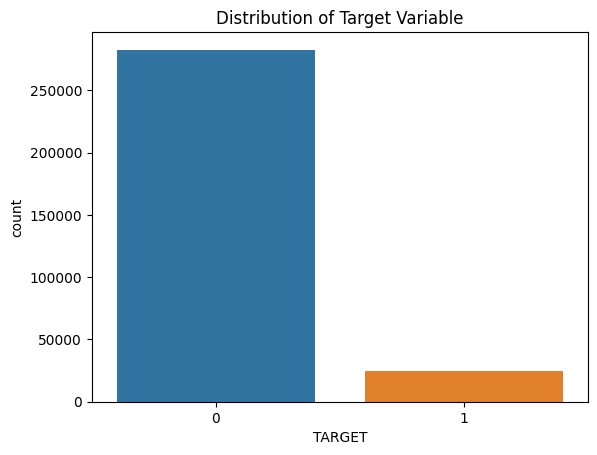

In [ ]:
sns.countplot(data=data, x= y)
plt.title("Distribution of Target Variable")
plt.show()

In [ ]:
sm = SMOTE()

X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

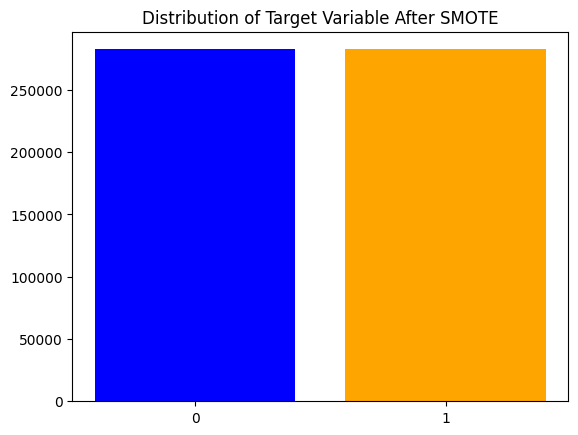

In [ ]:
unique_values, value_counts = np.unique(y_resampled, return_counts=True)

colors = ['blue', 'orange']


plt.bar(unique_values, value_counts, color = colors)
plt.title("Distribution of Target Variable After SMOTE")
plt.xticks(unique_values, ['0', '1'])
plt.show()

#### Feature Selection

In [ ]:
lasso = Lasso(alpha=0.0001, max_iter = 10000)

lasso.fit(X_resampled, y_resampled)

coefficients = lasso.coef_
feature_names = X_resampled.columns

selected_features = feature_names[coefficients != 0]

print("Selected Features:", selected_features)

Selected Features: Index(['NAME_CONTRACT_TYPE_Revolving loans', 'CNT_CHILDREN_1-2 Child',
       'CNT_CHILDREN_3-4 Child', 'CNT_CHILDREN_5+ Child',
       'AMT_INCOME_TOTAL_Income_Class_6', 'AMT_CREDIT_Credit_Class_2',
       'AMT_CREDIT_Credit_Class_3', 'AMT_CREDIT_Credit_Class_4',
       'AMT_CREDIT_Credit_Class_6', 'AMT_ANNUITY_Annuity_Class_2',
       ...
       'YEARS_BUILD_MEDI_0.80+ Score', 'AGE_Elder', 'AGE_Middle-Age',
       'AGE_Youth', 'YEARS_EMPLOYED_10+ Age', 'YEARS_EMPLOYED_4-10 Age',
       'YEARS_EMPLOYED_No Work', 'YEARS_REGISTRATION_10+ Register',
       'YEARS_REGISTRATION_4-10 Register', 'YEARS_REGISTRATION_No Register'],
      dtype='object', length=160)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected_features], y_resampled, test_size=0.2)

## Model Selection and Evaluation


In [ ]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7]
}

param_grid_lr = {
    'C': [0.1, 1.0, 10.0]
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
}

param_grid_nn = {
    'hidden_layers': [[64], [128], [64, 64], [128, 64]],  
    'activation': ['relu', 'sigmoid'],   
    'learning_rate': [0.001, 0.01, 0.1]
}

In [ ]:
def nn_model(hidden_layers=[64], activation='relu', dropout=0.2, learning_rate=0.001):

    input_dim = X_train.shape[1]   
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(input_dim,)))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def model(X_train, y_train, X_test, y_test):
    
  lr = LogisticRegression(random_state=42, max_iter = 10000)
  rf = RandomForestClassifier(random_state=42)
  dt = DecisionTreeClassifier(random_state=42)
  knn = KNeighborsClassifier()
  gb = GradientBoostingClassifier(random_state=42)
  bag = BaggingClassifier(estimator=dt, random_state=42)
  xgb = XGBClassifier(random_state=42)
  svm_ = svm.SVC(random_state=42)
  nn = KerasClassifier(build_fn=nn_model, verbose=0)
    
  models = {
      "Logistic Regression": (lr, param_grid_lr),
      "Random Forest": (rf, param_grid_rf),
      "Decision Tree": (dt, param_grid_dt),
      "KNN": (knn, param_grid_knn),
      "Gradient Boosting": (gb, param_gb),
      "Bagging Classifier": (bag, param_grid_bag),
      "XGBoost": (xgb, param_grid_xgb),
      "SVM": (svm_, param_grid_svm),
      "Neural Network": (nn, param_grid_nn)
  }
    
  results = {}
  best_models = {}
    
  for name, (model, param_grid) in models.items():
      grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc')
      grid_search.fit(X_train, y_train)
      best_model = grid_search.best_estimator_
        
      best_models[name] = best_model
        
      best_model.fit(X_train, y_train)
      y_pred_test = best_model.predict(X_test)
        
      results[name] = {
          "Accuracy Score": accuracy_score(y_test, y_pred_test),
          "AUC Score": roc_auc_score(y_test, y_pred_test),
          "F1 Score": f1_score(y_test, y_pred_test),
          "Precision Score": precision_score(y_test, y_pred_test),
          "Recall Score": recall_score(y_test, y_pred_test)
      }
        
  for name, metrics in results.items():
      print('Model: {}'.format(name))
      for metric_name, metric_value in metrics.items():
          print('{}: {}'.format(metric_name, metric_value))
      print()
    
  cv_mean_auc = {}
  for name, (model, _) in models.items():
      scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
      cv_mean_auc[name] = scores_auc.mean()
    
  return best_models, cv_mean_auc, results


### Results

In [ ]:
best_models, cv_mean_auc, results = model(X_train, y_train, X_test, y_test)

In [ ]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=10000, random_state=42),
 'Random Forest': RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                        min_samples_split=10, random_state=42),
 'KNN': KNeighborsClassifier(n_neighbors=9, weights='distance'),
 'Gradient Boosting': GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42),
 'Bagging Classifier': BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   max_features=0.5, n_estimators=100, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, import

In [ ]:
cv_mean_auc

{'Logistic Regression': 0.962376263954906,
 'Random Forest': 0.9715995096416533,
 'Decision Tree': 0.9203268694828649,
 'KNN': 0.9593081307584391,
 'Gradient Boosting': 0.973360220205816,
 'Bagging Classifier': 0.96562498340512,
 'XGBoost': 0.9752793848834742,
 'SVM': 0.947931381655722,
 'Neural Network': 0.9512259564154453}

In [ ]:
results

{'Logistic Regression': {'Accuracy Score': 0.9529576152771309,
  'AUC Score': 0.9529137529137529,
  'F1 Score': 0.950587084148728,
  'Precision Score': 1.0,
  'Recall Score': 0.9058275058275058},
 'Random Forest': {'Accuracy Score': 0.9608756404285049,
  'AUC Score': 0.9608404624691269,
  'F1 Score': 0.9593023255813953,
  'Precision Score': 0.9984871406959153,
  'Recall Score': 0.9230769230769231},
 'Decision Tree': {'Accuracy Score': 0.9408476944573824,
  'AUC Score': 0.9408307219382138,
  'F1 Score': 0.939696106362773,
  'Precision Score': 0.957426221577165,
  'Recall Score': 0.9226107226107226},
 'KNN': {'Accuracy Score': 0.9478341872380065,
  'AUC Score': 0.9477890187987908,
  'F1 Score': 0.945124938755512,
  'Precision Score': 0.9958699019101703,
  'Recall Score': 0.8993006993006993},
 'Gradient Boosting': {'Accuracy Score': 0.9545877969259432,
  'AUC Score': 0.9545502271886637,
  'F1 Score': 0.9526354141365072,
  'Precision Score': 0.994421906693712,
  'Recall Score': 0.914219114